In [1]:
from keras.engine import *
from keras.engine.topology import Container
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.losses import *
from keras.optimizers import *
import numpy as np
import keras.backend as K
from functools import reduce
from tqdm import tqdm_notebook
from keras.utils.np_utils import to_categorical
from matplotlib import pylab as plt
from IPython.display import clear_output
from MeCab import Tagger
from prefetch_generator import BackgroundGenerator

Using TensorFlow backend.


In [2]:
TEXT_LENGTH = 140

In [3]:
mecaber = Tagger("-Ochasen")
with open("./timeline/chahan69.txt", "r") as f:
    texts = []
    for line in f.readlines():
        pos = mecaber.parse(line).split("\n")[:-1]
        if len(pos) < 7:
            continue
        words = ["sosos"] + [x.split("\t")[0] for x in pos]
        texts.append(" ".join(words))
tokenizer = Tokenizer(filters="\n")

In [4]:
tokenizer.fit_on_texts(texts)
VOCAB = len(tokenizer.word_index)
X = tokenizer.texts_to_sequences(texts)

In [5]:
class InvTokenizer:
    def __init__(self, dic):
        self.dic = dic
        self.num = len(dic)
        self.invdec = ["" for _ in range(self.num + 1)]
        for c, i in self.dic.items():
            self.invdec[i] = c
    
    def __call__(self, array):
        if len(array) == 0: return("")
        return(reduce(lambda x,y:x+y,[self.invdec[int(i)] for i in list(array)]))
            
texgen = InvTokenizer(tokenizer.word_index)

In [6]:
def myloss(y_true, y_pred):
    elems = (y_true, y_pred)
#     acc = K.map_fn(lambda x:K.sparse_categorical_crossentropy(x[1], x[0]), elems)
    print(elems)
    acc = K.sparse_categorical_crossentropy(y_true, y_pred)
    return(K.mean(acc))
    
def get_model():
    inputs = Input(shape=(None,))
    y = inputs
    y = Embedding(VOCAB+1, 512, mask_zero=True)(y)
    y = Dropout(0.1)(y)
    y = GRU(512, return_sequences=True, recurrent_dropout=0.2)(y)
    y = Dropout(0.1)(y)
    y = GRU(512, return_sequences=True, recurrent_dropout=0.2)(y)
    y = TimeDistributed(Dense(VOCAB+1, activation="softmax", use_bias=False))(y)
    model = Model(inputs, y)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=RMSprop(1e-3))
    return(model)

def datagen(X, batch_size=128):
    x, y = [], []
    np.random.shuffle(X)
    for text in tqdm_notebook(X):
        x.append(text[:-1])
        y.append(text[1:])
        if len(y) >= batch_size:
            x = pad_sequences(np.array(x), maxlen=TEXT_LENGTH, padding="post")
            y = pad_sequences(y, maxlen=TEXT_LENGTH, padding="post")
            y = np.expand_dims(np.array(y), -1)
            yield(x, y)
            x, y = [], []

def get_text(mod):
    x = [[tokenizer.word_index["sosos"]]]
    while len(x[0]) < 50:
        y = mod.predict(np.array(x))[0][-1]
        y = np.random.choice(VOCAB+1, p=y)
        if y == 1:
            return(texgen(x[0][1:]))
        x[0].append(y)
    return(texgen(x[0][1:]))

In [7]:
mod = get_model()
history = []

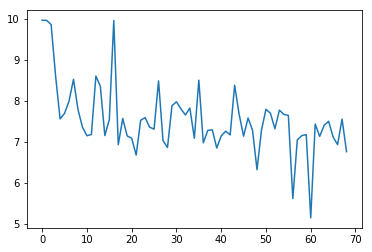

のこし深さの


In [ ]:
epoch = 100
batch_size = 128
mod.optimizer = RMSprop(1e-3)
for e in range(epoch):
    gen = datagen(X, batch_size=batch_size)
    text = get_text(mod)
    for x, y in BackgroundGenerator(gen):
        loss = mod.train_on_batch(x, y)
        history.append(loss)
        clear_output()
        plt.plot(history)
        plt.show()
        print(text)
mod.save(filepath="./auto_twitter_2.h5", overwrite=True)

In [ ]:
print("\n".join([get_text(mod) for _ in range(50)]))

In [24]:
mod.predict_on_batch(np.array([[2]])).argsort()[::-1]

array([[ 1281, 19576, 10277, ...,     3,    12,    52]])

In [30]:
texgen.invdec[3]

'！'

In [23]:
tokenizer.word_index

{'eos': 1,
 'sosos': 2,
 '！': 3,
 'の': 4,
 'て': 5,
 'た': 6,
 'に': 7,
 'で': 8,
 'し': 9,
 'が': 10,
 '･': 11,
 '？': 12,
 'は': 13,
 '〜': 14,
 'ん': 15,
 '…': 16,
 'ない': 17,
 '\u3000': 18,
 'な': 19,
 'か': 20,
 '´･': 21,
 'と': 22,
 'を': 23,
 'です': 24,
 'から': 25,
 'だ': 26,
 'ｗ': 27,
 'ます': 28,
 'てる': 29,
 'も': 30,
 'けど': 31,
 'する': 32,
 'よ': 33,
 'そう': 34,
 '。': 35,
 'たら': 36,
 '～': 37,
 'や': 38,
 '、': 39,
 'ッ': 40,
 '💦': 41,
 'o': 42,
 'なっ': 43,
 '「': 44,
 '」': 45,
 'って': 46,
 'ね': 47,
 '？？？': 48,
 'ドゥン': 49,
 'たい': 50,
 'こと': 51,
 'ござい': 52,
 'やっ': 53,
 'ある': 54,
 'さ': 55,
 'ので': 56,
 'スタンド': 57,
 '今日': 58,
 "'": 59,
 'あ': 60,
 'in': 61,
 'いい': 62,
 'う': 63,
 '・': 64,
 'まし': 65,
 'れ': 66,
 'a': 67,
 'お': 68,
 '´': 69,
 'き': 70,
 '皆伝': 71,
 'ぐらい': 72,
 '😎': 73,
 'c': 74,
 'ありがとう': 75,
 'い': 76,
 'すぎ': 77,
 '！！！！！！！！！！！！！！！！！！！！！！！！！': 78,
 'of': 79,
 'ぞ': 80,
 'ば': 81,
 'なら': 82,
 'とか': 83,
 '人': 84,
 'さん': 85,
 '気': 86,
 'じゃ': 87,
 '京都府': 88,
 'なる': 89,
 'だけ': 90,
 'それ': 91,
 'だっ': 92,
 'やん'

In [34]:
next(gen)[1].shape

(512, 140)